# Titel

# Importing the relevant libraries

In [200]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

## 1. Loading the raw data

In [201]:
# read data
data = pd.read_csv('data_prepared.csv')

In [202]:
# Show the first 20 rows of the data
data.head(20)

,Age,Gender,Quit,YearsOverall,BasicSalary,Contract,CusSize,TechRole,ThisYearBonus,LastYearBonus,Level
0,28,1,0,9.0,61200.0,Unlimited contract,1000+,1,1,1,Management
1,39,0,0,13.0,108000.0,Unlimited contract,1000+,0,0,0,Management
2,32,1,0,13.0,85000.0,Unlimited contract,1000+,1,1,1,Management
3,35,0,0,5.0,75000.0,Unlimited contract,1000+,1,1,0,Management
4,22,1,1,2.0,45000.0,Unlimited contract,1000+,1,1,1,Employee
5,31,1,1,2.5,20000.0,Unlimited contract,1000+,1,1,1,Management
6,30,0,0,6.0,70000.0,Unlimited contract,1000+,1,1,1,Management
7,40,0,0,20.0,54000.0,Unlimited contract,101 to 1000,1,0,0,Employee
8,35,1,0,1.0,30000.0,Temporary contract,up to 10,1,1,0,Employee
9,25,1,0,6.0,61500.0,Unlimited contract,1000+,1,1,0,Employee


# Data Cleaning 

In [203]:
# Entferne Spalte Gender, CusSize, ThisYearBonus, LastYearBonus
# Das sind alles unrlevante Daten für die Vorhersage des Gehalts unrelevant ist 
data = data.drop(['Gender'], axis=1)
data = data.drop(['CusSize'], axis=1)
data = data.drop(['ThisYearBonus'], axis=1)
data = data.drop(['LastYearBonus'], axis=1)

In [204]:
# print all columns
print(data.columns)
# print count of columns
print(len(data.columns))


Index(['Age', 'Quit', 'YearsOverall', 'BasicSalary', 'Contract', 'TechRole',
       'Level'],
      dtype='object')
7


In [205]:
# Von jedem Feature die indiividuellen Ausprägungen ausgeben
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f'Unique values for {column}:', data[column].unique())

Unique values for Contract: ['Unlimited contract' 'Temporary contract' '0']
Unique values for Level: ['Management' 'Employee' 'Top Management']


In [206]:
# Höhres Management wird ruasgelassen
# Behalte nur die Elemente mit Level Employee
data = data[data['Level'] == 'Employee']

In [207]:
# Verteilung der Spalte Contract
data['Contract'].value_counts()

Unlimited contract    383
Temporary contract     26
Name: Contract, dtype: int64

In [208]:
# Entferne den Wert 0 aus der Spalte Contract
data = data[data['Contract'] != 0]

In [209]:
# describe the data
data.describe()

,Age,Quit,YearsOverall,BasicSalary,TechRole
count,409.000000,409.000000,409.000000,4.090000e+02,409.000000
mean,29.948655,0.210269,5.387775,1.279006e+06,0.919315
std,4.522797,0.407999,3.751235,2.472061e+07,0.272684
min,22.000000,0.000000,0.000000,1.000100e+04,0.000000
25%,27.000000,0.000000,3.000000,4.985000e+04,1.000000
50%,29.000000,0.000000,5.000000,5.800000e+04,1.000000
75%,33.000000,0.000000,6.000000,6.500000e+04,1.000000
max,54.000000,1.000000,25.000000,5.000000e+08,1.000000


In [210]:
# streudiagramm für alle variablen
sns.pairplot(data)

In [211]:
# Erstelle einen neuen DataFrame der den data kopiert
data_clean = data.copy()


/var/folders/9n/l51dmzlx70jgqg93_yzvb_y00000gn/T/ipykernel_8176/3358464569.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['BasicSalary'])


<Axes: xlabel='BasicSalary', ylabel='Density'>

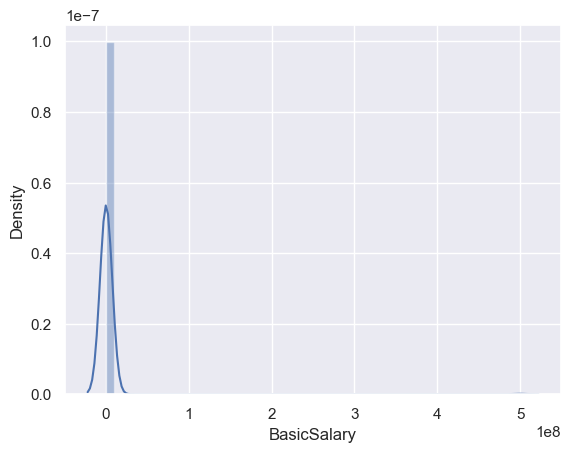

In [212]:
# Zeige die Verteilung bei BasicSalary
sns.distplot(data['BasicSalary'])

<Axes: >

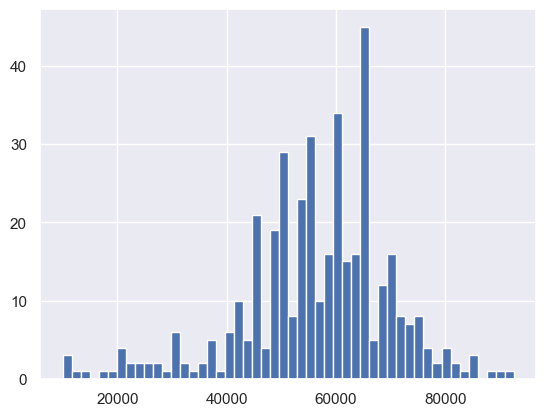

In [213]:
# Declare a variable that is equal to the 99th percentile of the 'BasicSalary' variable
q = data_clean['BasicSalary'].quantile(0.99)

# Create a new data file with the condition that all prices must be below the 99th percentile of 'Price'
# Remove the top 1% of the data about 'PreisTicket'
data_clean = data_clean[data_clean['BasicSalary'] < q]

data_clean['BasicSalary'].hist(bins=50)

In [214]:
# Entferne die Element wo Quit = 1
data_clean = data_clean[data_clean['Quit'] != 1]

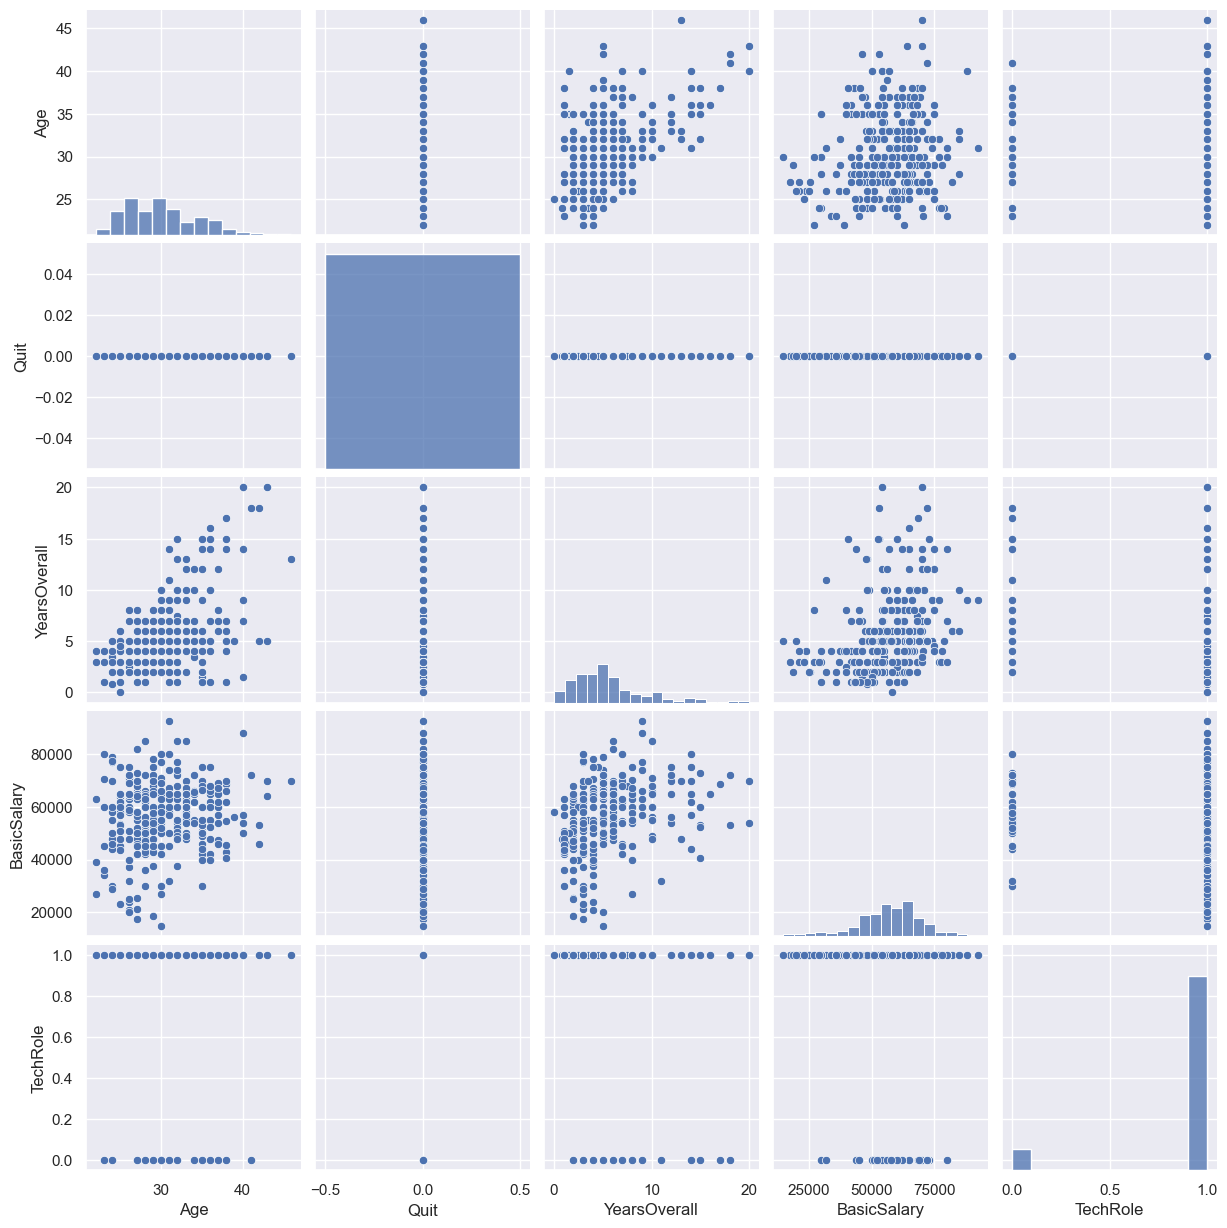

In [215]:
# streudiagramm für alle variablen
sns.pairplot(data_clean)

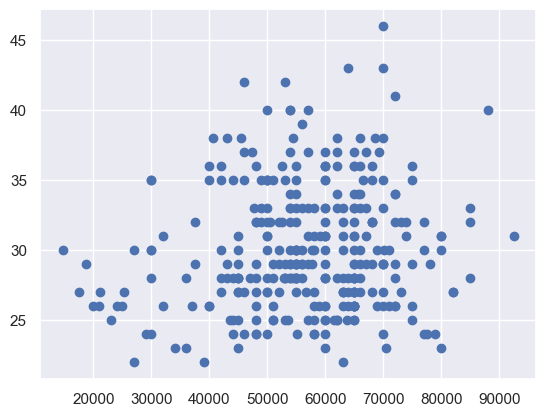

In [216]:
# Zeige Diagramme Basic Salary vs. Variablen
plt.scatter(data_clean['BasicSalary'],data_clean['Age'])


In [217]:
# Show correlations in a heatmap between all variables
# Create correlation matrix
#corr_matrix = data.corr().round(2)


# Create a heatmap
# sns.heatmap(data=corr_matrix, annot=True)


## 2.6 Dummy Variablen

In [218]:
# Erstelle für alle kategorialen Variablen mit mehr als zwei Ausprägungen dummy Variablen 
data_dummy = pd.get_dummies(data_clean, drop_first=True)
data_dummy.head()

,Age,Quit,YearsOverall,BasicSalary,TechRole,Contract_Unlimited contract
7,40,0,20.0,54000.0,1,1
8,35,0,1.0,30000.0,1,0
9,25,0,6.0,61500.0,1,1
20,33,0,4.0,50000.0,1,1
29,24,0,3.0,58000.0,1,1


In [219]:
# Gibt die Spaltennamen aus
print(data_dummy.columns)

Index(['Age', 'Quit', 'YearsOverall', 'BasicSalary', 'TechRole',
       'Contract_Unlimited contract'],
      dtype='object')


In [220]:
# Speichere alle Sapltennamen bist auf S
exclude_column = "BasicSalary"
column_names = [col for col in data_dummy.columns if col != exclude_column]

### Checking the OLS assumptions

### If ols true Distribution - Log Transformation

### Multicollinearity

In [221]:
# sklearn does not have a built-in way to check for multicollinearity
# Use the relevant module in statsmodel
# Documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Declare a data frame and out in all features we want to check for multicollinearity
# Since categorical data is not preprocessed, only take the numerical ones
variables = data_dummy[column_names]

# Create a new data frame which includes all VIFs
# Each variable has its own variance inflation factor. This measure is variable specific
vif = pd.DataFrame()

# Make use of the variance_inflation_factor module, output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

# Include variable names so it is easier to explore the result
vif["Features"] = variables.columns
vif

/Users/michael/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,VIF,Features
0,27.539842,Age
1,NaN,Quit
2,4.619649,YearsOverall
3,9.126485,TechRole
4,16.182679,Contract_Unlimited contract


In [222]:
# Entferne die Spalte Age aus dem Dataframe
data_dummy = data_dummy.drop(['Age'], axis=1)

In [223]:
# Speichere alle Sapltennamen bist auf X
exclude_column = "BasicSalary"
column_names = [col for col in data_dummy.columns if col != exclude_column]

In [224]:
# Declare a data frame and out in all features we want to check for multicollinearity
# Since categorical data is not preprocessed, only take the numerical ones
variables = data_dummy[column_names]

# Create a new data frame which includes all VIFs
# Each variable has its own variance inflation factor. This measure is variable specific
vif = pd.DataFrame()

# Make use of the variance_inflation_factor module, output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

# Include variable names so it is easier to explore the result
vif["Features"] = variables.columns
vif

/Users/michael/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,VIF,Features
0,NaN,Quit
1,3.025275,YearsOverall
2,7.175129,TechRole
3,8.672230,Contract_Unlimited contract


# Entferne die Spalte Contract_Unlimited contract aus dem Dataframe
data_dummy = data_dummy.drop(['Contract_Unlimited contract'], axis=1)

# Speichere alle Sapltennamen bist auf X
exclude_column = "BasicSalary"
column_names = [col for col in data_dummy.columns if col != exclude_column]

# Declare a data frame and out in all features we want to check for multicollinearity
# Since categorical data is not preprocessed, only take the numerical ones
variables = data_dummy[column_names]

# Create a new data frame which includes all VIFs
# Each variable has its own variance inflation factor. This measure is variable specific
vif = pd.DataFrame()

# Make use of the variance_inflation_factor module, output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

# Include variable names so it is easier to explore the result
vif["Features"] = variables.columns
vif

In [ ]:
# Erstelle eine Variable mit allen Features, die wir auf Multikollinearität überprüfen wollen
# data_mul = data_dummy.drop(['PreisTicket'], axis=1)
# Gibt die Columns aus
# data_mul.columns

In [225]:
# Mache eine Kopie von data_dummy und speichere sie in data_ready
data_ready = data_dummy.copy()

In [226]:
# Zeige die ersten 10 Zeilen an
data_ready.head(10)

,Quit,YearsOverall,BasicSalary,TechRole,Contract_Unlimited contract
7,0,20.0,54000.0,1,1
8,0,1.0,30000.0,1,0
9,0,6.0,61500.0,1,1
20,0,4.0,50000.0,1,1
29,0,3.0,58000.0,1,1
30,0,2.0,55200.0,1,1
36,0,4.0,53000.0,0,1
37,0,4.0,24000.0,1,1
39,0,2.0,50000.0,0,1
41,0,9.0,60000.0,1,1


In [ ]:
# data description
data_ready.describe(include='all')

## 2.6 Key Features identifizieren: 

In [ ]:
# Nun löschen wir unnötige Spalten für die Vorhersagen von "X" 
# Logische Begründung:


# 3.Modelle erstellen

## 3.1 Ziel und Featuers festlegen

In [227]:
# Ziel Variable ist der BasicSalary
# Feature Variablen sind alle anderen Spalten
target_y = data_dummy['BasicSalary']
features_x = data_dummy.drop(['BasicSalary'], axis=1)


# 3.2 Train Test Split

In [228]:
# imporitere train_test_split
# deklariere X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_x, target_y, test_size=0.2, random_state=52)

# 3.3 Skalieren der Testdaten

In [229]:
# Import the scaling module and create a scaler object
# skaliere die trainingsdaten
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

# Überschreiben der Variablen
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [230]:
# import ohter regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [231]:
# importiere die Kontrollfunktionen
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Optimierung der Hyperparameter
from sklearn.model_selection import GridSearchCV


## 3.4 Lineare Regession 

In [232]:
# Kreiere ein leeres Dataframe
# Fit das Modell mit den Trainingsdaten
lre = LinearRegression()
lre.fit(X_train, y_train)

LinearRegression()

In [233]:
# Kalklkureiere die Vorhersage mit den Testdaten
y_pred_linear = lre.predict(X_test)


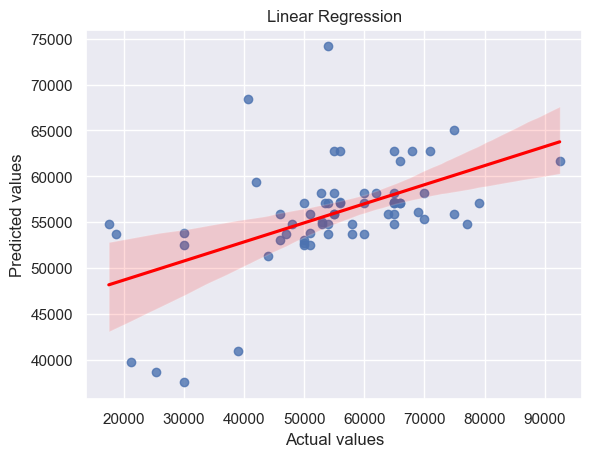

In [234]:
#Plotten Sie die Vorhersagen und die tatsächlichen Werte mit einer Regionslinie.
sns.regplot(x=y_test, y=y_pred_linear, line_kws={"color": "red"})
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression')
plt.show()

/var/folders/9n/l51dmzlx70jgqg93_yzvb_y00000gn/T/ipykernel_8176/559050226.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred_linear), bins=50)


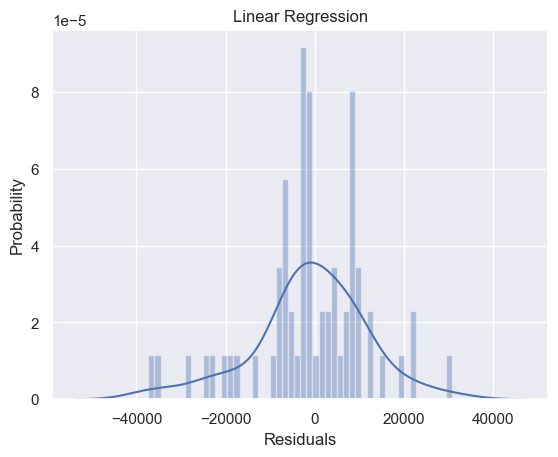

In [235]:
# Überprüfen Sie das Modell mit einem Residuenplot.
# Plotten Sie die PDF der Residuen und prüfen Sie auf Anomalien.
sns.distplot((y_test-y_pred_linear), bins=50)
plt.xlabel('Residuals') 
plt.ylabel('Probability')
plt.title('Linear Regression')
plt.show()


In [236]:
# Berechne den R2 Score
r2_score(y_test, y_pred_linear)

0.24879389810493235

In [237]:
# Berechne den MSE
mean_squared_error(y_test, y_pred_linear)

157841068.92760703

In [238]:
# Berechne die gewichtung der einzelnen Features
lre.coef_
# Zeige die besten Features an
coeffecients = pd.DataFrame(lre.coef_,features_x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Quit,0.000000
YearsOverall,4097.085887
TechRole,278.051526
Contract_Unlimited contract,3052.951695


In [239]:
# Search for improvements
# Imprort the linear regression module
# Ist allgmein nicht gut das Model

## 3.4 Test Lineare Regression


In [240]:
# Testen Sie das Modell mit neuen Daten.
# Unsere Testeingaben sind 'x_test', während die Ausgaben: 'y_test' gegeben sind.
# Wir verwenden die Methode: '.predict()', um die Ausgaben mit den gegebenen Eingaben vorherzusagen.
# Wir speichern die Vorhersagen in der Variablen: 'predictions'.
predictions_lre_test = lre.predict(X_test)

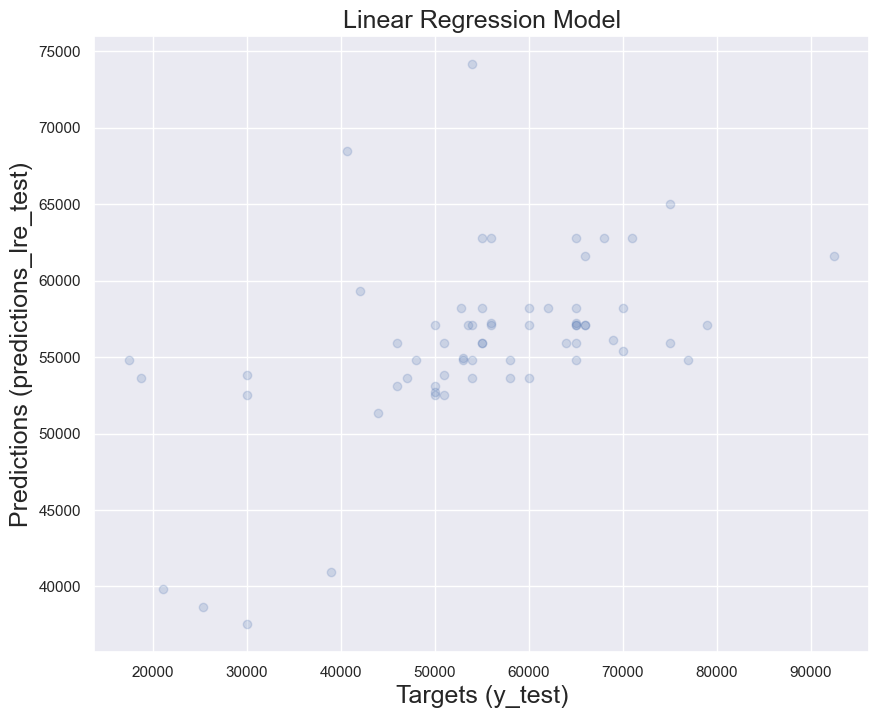

In [241]:
# Erstellen Sie ein Streudiagramm mit den Testzielen und den Testvorhersagen.
# Sie können das Argument 'alpha' hinzufügen, das dem Diagramm eine Opazität verleiht.
# Fügen Sie alpha=0,2 zum Diagramm hinzu, um eine Heatmap zu erzeugen.
plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions_lre_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (predictions_lre_test)',size=18)
plt.title('Linear Regression Model',size=18)
plt.show()

In [242]:
# Berechnen Sie den R2-Wert und den MSE des Modells.
r2_score(y_test, predictions_lre_test)
print(r2_score(y_test, predictions_lre_test))
# Berechne den MSE
mean_squared_error(y_test, predictions_lre_test)
print(mean_squared_error(y_test, predictions_lre_test))

0.24879389810493235
157841068.92760703


In [243]:
# Model Zusammenfassung
r2_train = lre.score(X_train, y_train)
r2_test = lre.score(X_test, y_test)
mse_train = mean_squared_error(y_train, lre.predict(X_train))
mse_test = mean_squared_error(y_test, lre.predict(X_test))
print('R2 Training: ', r2_train, 'MSE Training: ', mse_train)
print('R2 Test: ', r2_test, 'MSE Test: ', mse_test)

R2 Training:  0.14898903536025165 MSE Training:  141533413.83727586
R2 Test:  0.24879389810493235 MSE Test:  157841068.92760703


In [259]:
from sklearn.metrics import mean_absolute_error

# y_test enthält die wahren Werte und y_predictions enthält die vorhergesagten Werte
mae = mean_absolute_error(y_test, predictions_lre_test)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 9189.901520878651


In [260]:
# Gebe es den MAE in prozent an
print("Mean Absolute Error in %:", mae / y_test.mean())

Mean Absolute Error in %: 0.16727349957801033


# Random Forest Regression

In [264]:
rf = RandomForestRegressor (n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [265]:
#Berechnung der Vorhersagen in der Variablen y_pred_rf
y_pred_rf = rf.predict(X_train)

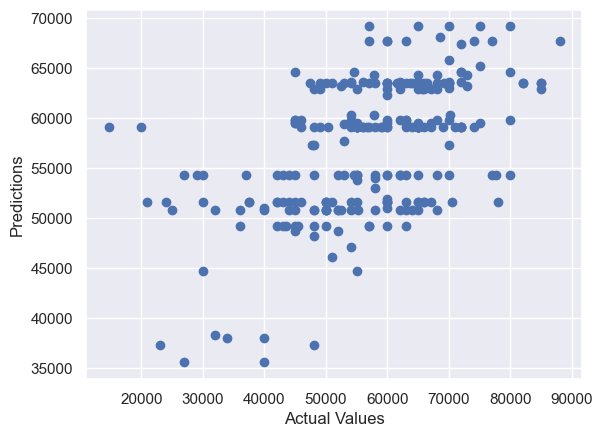

In [266]:
# Plotten Sie die Vorhersagen und die tatsächlichen Werte mit einer Regionslinie
plt.scatter(y_train, y_pred_rf)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

/var/folders/9n/l51dmzlx70jgqg93_yzvb_y00000gn/T/ipykernel_8176/1100182702.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_pred_rf), bins=50)


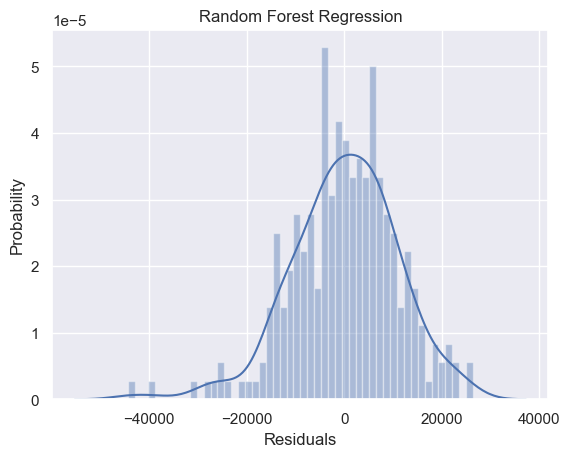

In [267]:
# Überprüfung des das Modell mit einem Residuenplot.
# Plotten PDF der Residuen und prüfen auf Anomalien.
sns.distplot((y_train-y_pred_rf), bins=50)
plt.xlabel('Residuals')
plt.ylabel('Probability')
plt.title('Random Forest Regression')
plt.show()

In [255]:
# Berechne die gewichtung der einzelnen Features
rf.feature_importances_
# Zeige die besten Features an
coeffecients = pd.DataFrame(rf.feature_importances_,features_x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Quit,0.000000
YearsOverall,0.770763
TechRole,0.062429
Contract_Unlimited contract,0.166808


In [268]:
# R2 Score
r2_score(y_train, y_pred_rf)

0.2855735111583455

In [249]:
# MSE
mean_squared_error(y_train, y_pred_rf)

118593320.35393573

# Suche nach optimierugn: 

## Test Random Forrest 

In [250]:
# Wir verwenden die Methode: '.predict()', um die Ausgaben mit den gegebenen Eingaben vorherzusagen.
# Wir speichern die Vorhersagen in der Variablen: 'predictions'.
predictions_rf = rf.predict(X_test)

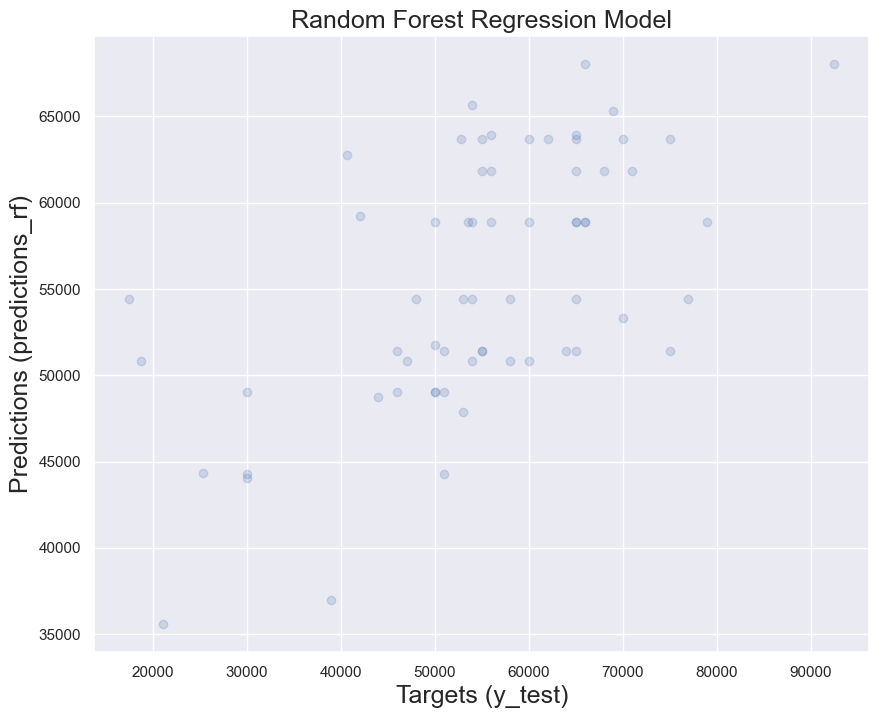

In [251]:
# Erstellen Sie ein Streudiagramm mit den Testzielen und den Testvorhersagen.
# Sie können das Argument 'alpha' hinzufügen, das dem Diagramm eine Opazität verleiht.
# Fügen Sie alpha=0,2 zum Diagramm hinzu, um eine Heatmap zu erzeugen.
plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions_rf, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (predictions_rf)',size=18)
plt.title('Random Forest Regression Model',size=18)
plt.show()

In [252]:
# Erstlle einen DataFrame mit tatächlichen Werten und den Vorhersagen und einer Spalte mit den prozentualen Fehlern
df_pf = pd.DataFrame(y_test, columns=['Targets'])
df_pf['Predictions'] = predictions_rf
df_pf['Residuals'] = df_pf['Targets'] - df_pf['Predictions']
df_pf['Difference%'] = np.absolute(df_pf['Residuals']/df_pf['Targets']*100)
df_pf

,Targets,Predictions,Residuals,Difference%
0,NaN,61860.012195,NaN,NaN
1,NaN,63912.699468,NaN,NaN
2,NaN,58876.105683,NaN,NaN
3,NaN,58876.105683,NaN,NaN
4,NaN,44301.846820,NaN,NaN
...,...,...,...,...
59,NaN,68020.079365,NaN,NaN
60,NaN,50827.404268,NaN,NaN
61,NaN,44301.846820,NaN,NaN
62,NaN,61860.012195,NaN,NaN


In [253]:
# R2 Score
r2_score(y_test, predictions_rf)

0.34305899589867783

In [254]:
# MSE
mean_squared_error(y_test, predictions_rf)

138034382.37275186

In [262]:
# Model Zusammenfassung
r2_train = rf.score(X_train, y_train)
r2_test = rf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, rf.predict(X_train))
mse_test = mean_squared_error(y_test, rf.predict(X_test))
print('R2 Training: ', r2_train, 'MSE Training: ', mse_train)
print('R2 Test: ', r2_test, 'MSE Test: ', mse_test)

R2 Training:  0.2869230436971697 MSE Training:  118593320.35393573
R2 Test:  0.34305899589867783 MSE Test:  138034382.37275186


In [256]:
from sklearn.metrics import mean_absolute_error

# y_test enthält die wahren Werte und y_predictions enthält die vorhergesagten Werte
mae = mean_absolute_error(y_test, predictions_rf)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 8749.468476765323


In [261]:
# MAE in Prozent
print("Mean Absolute Error in %:", mae / y_test.mean())

Mean Absolute Error in %: 0.16727349957801033


In [263]:
# Modellverbesserung, wrude zum Teil getestet hat ncihts gebracht
# Modellauswahl: Cross-Validation verwenden
##tree_depths = [5, 10, 15, 20]
#model_scores = []

#for depth in tree_depths:
   # dt = DecisionTreeRegressor(max_depth=depth)
   # scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='r2')
    #model_scores.append(scores.mean())

# Ausgabe der durchschnittlichen R2-Werte der Modelle
#for depth, score in zip(tree_depths, model_scores):
   # print(f"Decision Tree with max_depth={depth}: R2 = {score}")